Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'class'],
      dtype='object')

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.758702e-12 -8.252296e-13 -9.637438e-13  8.316234e-13   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

             

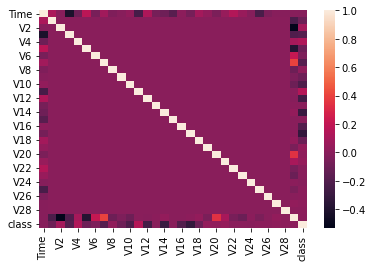

C:\Users\Surya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


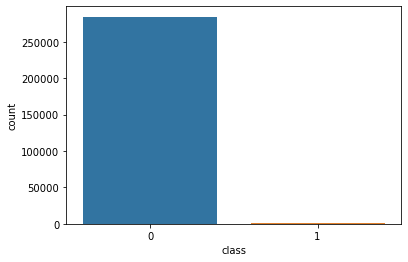

In [1]:
import pandas as pd
data=pd.read_csv('C:/Users/Surya/Desktop/Lab Programs/NNDL/New folder//Credit Card/creditcard.csv')
print(data.columns)
print()
print(data.describe())
print()
print(data.isna().sum())
print()
print(data.corr())
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(data.corr())
plt.show()
sn.countplot(data['class'])
plt.show()
q1=data['V1'].quantile(0.25)
q3=data['V1'].quantile(0.75)
q_1=data['V2'].quantile(0.25)
q_3=data['V2'].quantile(0.75)
qu_1=data['V3'].quantile(0.25)
qu_3=data['V3'].quantile(0.75)
qua_1=data['V4'].quantile(0.25)
qua_3=data['V4'].quantile(0.75)
quant_1=data['V5'].quantile(0.25)
quant_3=data['V5'].quantile(0.75)
quanti_1=data['V6'].quantile(0.25)
quanti_3=data['V6'].quantile(0.75)

In [2]:
data = data.iloc[:50000]
len(data)

50000

In [3]:
#a=data[(data['V1'] < q3) |  (data['V1'] >q1)|(data['V2'] > q_3)|(data['V2']>q_1) | (data['V3'] <qu_3) | (data['V3'] > qu_1) | (data['V4'] < qua_3)|(data['V4'] >qua_1) | (data['V5'] < quant_3)|(data['V5'] >quant_1)|(data['V6'] < quanti_3)|(data['V6'] > quanti_1)].values
from sklearn.preprocessing import MinMaxScaler
stand=MinMaxScaler()
x=data.iloc[:,1:29].values
y=data['class'].values
x=stand.fit_transform(x)
y=pd.DataFrame(y)
print(y)
y=stand.fit_transform(y)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.25)
import keras.activations,keras.losses
from keras.models import  Sequential
from keras.layers import Dense
model=Sequential()
model.add(Dense(30,activation=keras.activations.sigmoid))
model.add(Dense(256,activation=keras.activations.sigmoid))
model.add(Dense(256,activation=keras.activations.sigmoid))
model.add(Dense(256,activation=keras.activations.sigmoid))
model.add(Dense(256,activation=keras.activations.sigmoid))
model.add(Dense(256,activation=keras.activations.sigmoid))
model.add(Dense(256,activation=keras.activations.sigmoid))
model.add(Dense(256,activation=keras.activations.sigmoid))
model.add(Dense(units=x_train.shape[1],activation=keras.activations.sigmoid))
model.add(Dense(units=x_train.shape[1],activation=keras.activations.sigmoid))
model.add(Dense(units=1,activation=keras.activations.sigmoid))
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy,metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=20,epochs=25)
pred=model.predict(x_test)
print(pred)
evalueation=model.evaluate(x_test,y_test)
print(evalueation)

       0
0      0
1      0
2      0
3      0
4      0
...   ..
49995  0
49996  0
49997  0
49998  0
49999  0

[50000 rows x 1 columns]
Epoch 1/25
625/625 [==============================] - 4s 4ms/step - loss: 0.0907 - accuracy: 0.9845
Epoch 2/25
625/625 [==============================] - 2s 4ms/step - loss: 0.0200 - accuracy: 0.9973
Epoch 3/25
625/625 [==============================] - 2s 4ms/step - loss: 0.0189 - accuracy: 0.9973
Epoch 4/25
625/625 [==============================] - 2s 4ms/step - loss: 0.0188 - accuracy: 0.9973
Epoch 5/25
625/625 [==============================] - 2s 4ms/step - loss: 0.0188 - accuracy: 0.9973
Epoch 6/25
625/625 [==============================] - 2s 4ms/step - loss: 0.0188 - accuracy: 0.9973
Epoch 7/25
625/625 [==============================] - 2s 4ms/step - loss: 0.0188 - accuracy: 0.9973
Epoch 8/25
625/625 [==============================] - 2s 4ms/step - loss: 0.0188 - accuracy: 0.9973
Epoch 9/25
625/625 [==============================] - 2s 4ms/step 

In [6]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,44296.0,-1.007648,0.722149,0.779027,-1.466661,0.298457,-0.263997,0.442429,0.400734,-0.591588,...,0.137489,0.171923,-0.205126,-0.650297,0.072522,1.391071,-0.167746,-0.019007,39.99,0
49996,44297.0,-5.202399,2.077079,-3.905209,1.097967,-1.719915,-0.803272,-1.162430,2.679623,-0.640010,...,-0.071897,0.396541,0.298550,-0.451037,-0.076617,-0.317780,0.508982,-0.144442,99.99,0
49997,44298.0,-1.597980,-0.363988,2.114888,-1.101263,-0.291577,0.009897,0.456899,0.029229,0.712018,...,-0.161615,0.008125,-0.142336,0.078871,-0.016251,0.836074,0.302804,-0.022386,172.14,0
49998,44298.0,-2.998734,2.323844,-2.419829,0.941745,-1.436231,-0.847601,-0.582896,1.965394,-0.846173,...,0.201051,0.456424,-0.059220,0.040043,-0.435842,-0.391904,0.375636,-0.024394,89.99,0


In [8]:
y_pred = []
for x in pred:
    y_pred.append(x>0.5)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[37386,     0],
       [  114,     0]], dtype=int64)